**A Comparison of Logistic Regression and Random Forest with Dimension Reduction for
Breast Cancer Classification**
(Accuracy=0.991 Sensitivity=0.977 Specificity=1.000 Precision=1.000)

* **1. Load libraries and clean data**

* **2. Data analysis**

 * **2. 1. Descriptive  Statistics**

 * **2. 2. Outlier detection**

 * **2. 3. Target distribution**

 * **2. 4. Selected Joint and marginal Feature distributions**

 * **2. 5. Correlation matrix**

* **3. Data preprocessing and Feature Engineering**

 * **3. 1. Encoding labels**

 * **3. 2. Data split**

 * **3. 3. Feature Engineering**

    * **3. 3. 1. Scaler**

    * **3. 3. 2. Dimensionality reduction**

      * **Principal component analysis (PCA)**

      * **Recursive features elimination(RFE)**

* **4. Grid Search Cross validation**

 * **4. 1. Find the best hyperparameters**

 * **4. 2. # of Components in PCA versus Model Accuracy/Training Time** 

* **5. Model Measures**

 * **5. 1. Confusion Matrices & Metrics**

 * **5. 2. ROC curves (AUC)**

 * **5. 3 Precision-recall curves**

* **6. Model  comparison**

 * **6. 1. logisitic Regression**

 * **6. 2. logistic Regression with PCA**

    * **6. 2. 1. # of Components in PCA versus Model Accuracy/Training Time**

    * **6. 2. 2. logistic Regression with PCA (8 components)**
    (threshold = 0.5 : Accuracy=0.991 Sensitivity=0.977 Specificity=1.000 Precision=1.000)

    * **6. 2. 3. Adjusting thresholds for metrics**

 * **6. 3. Random Forest**

 * **6. 4. Random Forest with PCA**

    * **6. 4. 1. # of Components in PCA versus Model Accuracy/Training Time**

    * **6. 4. 2. logistic Regression with PCA (14 components)**

 * **6. 5. Random Forest with RFE ( Recursive features elimination)**

 * **6. 6. Model Performance Plot**

### About Dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

**1.  Load libraries and clean data**

In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_curve, precision_recall_curve, auc
from plotly.subplots import make_subplots
import itertools
# Run the following two lines of code for Uncaught Error: Script error for plotly
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [3]:
df = pd.read_csv('/home/adr/Dropbox/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
missing_values_count = df.isnull().sum()
missing_values_count

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

**2. Data analysis**

**2. 1. Descriptive  Statistics**

In [6]:
df.shape

(569, 31)

In [7]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**2. 2. Outlier detection**

In [9]:
names = df.columns[5:11]
# convert DataFrame to list
values=[] 
for column in df.iloc[:,5:11].columns:
    li = df[column].tolist()
    values.append(li)
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen','cyan', 'royalblue']

fig = go.Figure()
for xd, yd, cls in zip(names, values, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='outliers',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=3,
            line_width=2)
        )
fig.show()

**2. 3. Target distribution**

In [10]:
fig = go.Figure(data=[go.Pie(labels=['Benign','Malignant'], values=df['diagnosis'].value_counts(), textinfo='label+percent')])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['gold', 'mediumturquoise'], line=dict(color='#000000', width=2)))
fig.show()

**2. 4. Selected Joint and marginal Feature distributions**

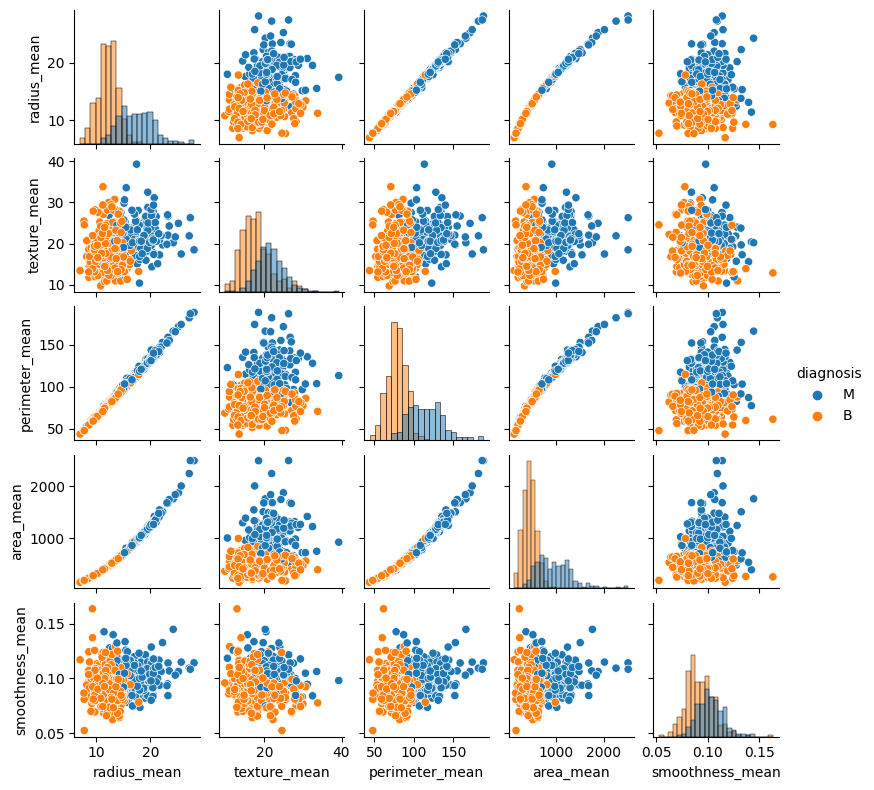

In [11]:
sns.pairplot(df.iloc[:,:6],hue='diagnosis', diag_kind='hist',height=1.6)

**2. 5. Correlation matrix**

In [12]:
corr = df.iloc[:,1:].corr()
fig = go.Figure(data=go.Heatmap(z=np.array(corr),x=corr.columns.tolist(),y=corr.columns.tolist(),xgap = 1,ygap = 1))
fig.update_layout(margin = dict(t=25,r=0,b=200,l=200),width = 1000, height = 700)
fig.show()

**3. Data preprocessing and Feature Engineering**

**3. 1. Encoding labels**

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis']) # M:1, B:0
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

**3. 2. Data split**

In [14]:
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df['diagnosis'], test_size = 0.2, random_state = random_state)

**3. 3. Feature Engineering**

**3. 3. 1. Scaler**

In meachine learning, many algorithms (expect some algorithms ,like decision trees and random forests) are sensitive to features with different scales, so it’s important to scale numerical input variables to a standard range. Normalizer (standard deviation scaling) and StandardScaler (mean removal and  standard deviation scaling) are the two most popular scaling techniques. In this case, we dectect in boxplots that some features contains a few extreme outlies which are not easy to remove or replace. Extreme outlies often influence the sample mean / variance in a negative way. Therefore, the above two scalers might not work very well here. We use **RobustScaler** as a replacement. This scaler is more robust to outliers by removing the median and scaling the data according to the quantile range.

In [15]:
scale = RobustScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

**3. 3. 2. Dimensionality reduction**

From correlation matrix and Joint and marginal distributions plots, we observe that some features are highly correlated, like radius_mean, perimeter_mean and area_mean. Those features have almost the same effect on the dependent variable. In real world problem, classification algorithms including too many features in dataset commonly suffer from the "Curse of Dimensionality", which means more data, bulky computation, and also overfitting risk. Both feature selection (selecting specific features to include) and feature extraction(extracting a new feature set from the input features) can effectively avoid these problems. **In practice, the effectiveness of dimensionality reduction highly depends on the algorithm to be applied later and type of the data to be passed into the methodology.** Here, we will try two different methods: **Principal component analysis (PCA)** and **Recursive features elimination(RFE)**, and also compare the results by separately using them on classification algorithms. 

* **Principal component analysis (PCA)**

In [16]:
pca = PCA()
pca.fit(X_train)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

fig = px.line(x=np.arange(1,exp_var_cumul.shape[0]+1), y=exp_var_cumul, markers=True, labels={'x':'# of components', 'y':'Cumulative Explained Variance'})

#fig.add_shape(type='line', line=dict(dash='dash'),x0=0, x1=30, y0=0.95, y1=0.95)

fig.show()

There is an elbow after the seventh component, and 91% of the total variance is explained by the firrst seventh components. If keeping the first 10 or 17 principal components, we can preserve about 95 % or even more than 99% of the total variance.

* **Recursive features elimination(RFE)**

Recursive feature elimination (RFE) is a feature selection method. The process is that a separate model is trained and each time the weakest features are taken away, until the optimum set of features to use for the maximum results is reached. 

In [1]:
# Fit the RFE model to identify the optimum number of features .
rfecv = RFECV(cv=StratifiedKFold(n_splits=10, random_state=random_state, shuffle=True),
      estimator=DecisionTreeClassifier(), scoring='accuracy')
    
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15,5))
plt.xlabel("# of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
    rfecv.cv_results_['mean_test_score'],
)
plt.show()


KeyboardInterrupt



We can visualise how the model’s performance changes when the number of features increases by ploting the number of features used in the model versus the model accuracy. As you can see, more features isn’t always better. The accuracy value has reached the highest when the first # important features are used in the model.

In [18]:
# Identifying the features RFE selected
df_features = pd.DataFrame(columns = ['feature', 'support', 'ranking'])

for i in range(X_train.shape[1]):
    row = {'feature': i, 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i]}
    df_features = df_features.append(row, ignore_index=True)
    
df_features.sort_values(by='ranking').head(10) #df_features[df_features['support']==True]

/tmp/ipykernel_90587/2104047245.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_90587/2104047245.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_90587/2104047245.py:6: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

/tmp/ipykernel_90587/2104047245.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_90587/2104047245.py:6: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

/tmp/ipykernel_90587/2104047245.py:6: FutureWarning:

T

,feature,support,ranking
14,14,True,1
24,24,True,1
22,22,True,1
21,21,True,1
20,20,True,1
19,19,True,1
17,17,True,1
27,27,True,1
13,13,True,1
26,26,True,1


In [19]:
# Identifying the features' name RFE selected
df.columns[1:][rfecv.get_support()]

Index(['concave points_mean', 'area_se', 'smoothness_se', 'concave points_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'smoothness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

**4. Grid Search Cross validation**

**4. 1. Find the best hyperparameters**

In [20]:
def modelselection(classifier, parameters, scoring, X_train):
    clf = GridSearchCV(estimator=classifier,
                   param_grid=parameters,
                   scoring= scoring,
                   cv=5,
                   n_jobs=-1)# n_jobs refers to the number of CPU's that you want to use for excution, -1 means that use all available computing power.
    clf.fit(X_train, y_train)
    cv_results = clf.cv_results_
    best_parameters = clf.best_params_
    best_result = clf.best_score_
    print('The best parameters for classifier is', best_parameters)
    print('The best training score is %.3f:'% best_result)
#    print(sorted(cv_results.keys()))
    return cv_results, best_parameters, best_result

**4. 2. # of Components in PCA versus Model Accuracy/Training Time** 

In [21]:
def PCA_curves(PCA_cv_score, PCA_test_score, training_time):
    fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "scatter"}, {"type": "scatter"}]],
    subplot_titles=('# of Components in PCA versus Model Accuracy','# of Components in PCA versus Training Time')
    )
    
    fig.add_trace(go.Scatter(x=n,y=PCA_cv_score,
                             line=dict(color='rgb(231,107,243)', width=2), name='CV score'),
                  row=1, col=1)
    fig.add_trace(go.Scatter(x=n,y=PCA_test_score,
                             line=dict(color='rgb(0,176,246)', width=2), name='Test score'),              
                  row=1, col=1)    
    fig.add_trace(go.Scatter(x=n,y=training_time,
                             line=dict(color='rgb(0,100,80)', width=2), name='Training time'),
                  row=1, col=2)
    fig.update_xaxes(title_text='# of components')
    fig.update_yaxes(title_text='Accuracy', row=1, col=1)
    # fig.update_xaxes(title_text="Recall", row=1, col=2)
    fig.update_yaxes(title_text='Training time', row=1, col=2)
    fig.show()

**5. Model Measures**

**5. 1. Confusion Matrices & Metrics**

A confusion matrix is a table that categorizes predictions according to whether they match the actual value
* True Positive (TP):  Malignant tumour correctly classified as Malignant
* True Negative (TN): Benign tumour correctly classified as benign
* False Positive (FP): Benign tumour incorrectly classified as malignant
* False Negative (FN): Malignant tumour incorrectly classified as benign

Metrics
* Accuracy (called the success rate): (tp+tn)/(tp+tn+fp+fn)
* Sensitivity (also called the true positive rate): tp/(tp+fn)
* Specificity (also called the true negative rate): tn/(tn+fp)
* Precision (also called the positive predictive value): tp/(tp+fp)
* Recall: as the same as sensitivity
* F-measure: 2*Precision*Recall/(Recall+Precision) = 2tp/(2tp+fp+fn)

In [22]:
def metrics(X,CV_clf):
    y_pred = CV_clf.predict(X)
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tp = cm[1,1]
    Accuracy=(tp+tn)/(tp+tn+fp+fn)
    Sensitivity=tp/(tp+fn)
    Specificity=tn/(tn+fp)
    Precision=tp/(tp+fp)
    F_measure=2*tp/(2*tp+fp+fn)
    print('Accuracy=%.3f'%Accuracy)
    print('Sensitivity=%.3f'%Sensitivity) # as the same as recall
    print('Specificity=%.3f'%Specificity)
    print('Precision=%.3f'%Precision)
    print('F-measure=%.3f'%F_measure)
    return Accuracy, Sensitivity, Specificity, Precision, F_measure
 #   plot_confusion_matrix(CV_clf, X_test, y_test)

**5. 2. ROC curves (AUC)**

* ROC curves: 

Summarize the trade-off between the true positive rate (sensitivity/recall) and false positive rate (1 – specificity) for a predictive model using different probability thresholds.

used when datasets for each class are roughly equal.

A classifier with no predictive value: a curve falls close to the diagonal line.

A perfect classifier: a curve passes through the point at a 100% true positive rate and 0% false positive rate.

AUC: measure the area under the ROC curve, range from 0.5 (for a classifier with no predictive value) to 1.0 (for a perfect classifier).

**5. 3 Precision-recall curves**

Summarize the trade-off between the true positive rate (sensitivity/recall) and the positive predictive value (precision) for a predictive model using different probability thresholds.

used when datasets for each class are moderate to large imbalance.

A perfect classifier: a curve bows towards (1,1) and above the flat line (y=0.5) of no skill.

In [23]:
def plot_roc_prc():
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    fig = make_subplots(
        rows=1, cols=2,
        specs=[[{"type": "scatter"}, {"type": "scatter"}]],
        subplot_titles=(f'ROC Curve (AUC={auc(fpr, tpr):.4f})',f'Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})')
    )
    fig.add_trace(go.Scatter(x=fpr, y=tpr),row=1, col=1)
    fig.add_shape(type='line', line=dict(dash='dash'),x0=0, x1=1, y0=0, y1=1,row=1, col=1)
    fig.add_trace(go.Scatter(x=recall, y=precision),row=1, col=2)
    fig.add_shape(type='line', line=dict(dash='dash'),x0=0, x1=1, y0=0.5, y1=0.5,row=1, col=2)
    # Update axis properties
    fig.update_xaxes(title_text="False Positive Rate / 1-Specificity", row=1, col=1)
    fig.update_yaxes(title_text="True Positive Rate / Recall", row=1, col=1)
    fig.update_xaxes(title_text="Recall", row=1, col=2)
    fig.update_yaxes(title_text="Precision", row=1, col=2)
    fig.show()

**6. Model  comparison**

**6. 1. logisitic Regression**

In [24]:
classifier_log = LogisticRegression(random_state=random_state,solver='lbfgs', max_iter=1000)
parameters_log = {
            'penalty' : ['l2'],  
            'C' : [0.01, 0.1, 1, 10, 100]
}
scoring='accuracy'   # scoring parameters: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# Find the best hyperparameters
cv_results, best_param, best_result = modelselection(classifier_log,parameters_log, scoring, X_train)

The best parameters for classifier is {'C': 10, 'penalty': 'l2'}
The best training score is 0.978:


In [25]:
# Classifier with the best hyperparameters
logReg_clf = LogisticRegression(penalty = best_param['penalty'],
                            C = best_param['C'],
                            random_state=random_state)
logReg_clf.fit(X_train, y_train)

# Metrics
logReg_metrics = metrics(X_test,logReg_clf)

Accuracy=0.974
Sensitivity=0.977
Specificity=0.972
Precision=0.955
F-measure=0.966


**6. 2. logistic Regression with PCA**

In [26]:
def compare_pca(n_components):
    cv_score, test_score, cv_training_time = [], [], []
    for n in n_components:
        print("The number of components in PCA is:%d "% n)
        pca = PCA(n_components=n, svd_solver="full",random_state=random_state)
        X_PCA_train = pca.fit_transform(X_train)
        X_PCA_test = pca.transform(X_test)
        # Model Selection
        cv_results, best_param, best_result = modelselection(classifier_log,parameters_log, scoring, X_PCA_train)
        training_time = np.mean(np.array(cv_results['mean_fit_time'])+np.array(cv_results['mean_score_time']))
        cv_score.append(best_result)
        cv_training_time.append(training_time)
        CV_clf = LogisticRegression(penalty = best_param['penalty'],
                                    C = best_param['C'],
                                    random_state=random_state)
        CV_clf.fit(X_PCA_train, y_train)
        score = CV_clf.score(X_PCA_test, y_test)
        test_score.append(score)
    print(cv_score, test_score, cv_training_time)
    return cv_score, test_score, cv_training_time

In [27]:
n_features = X_train.shape[1]
n = np.arange(2, n_features+2, 2) 

PCA_cv_score, PCA_test_score, PCA_cv_training_time= compare_pca(n_components = n)

The number of components in PCA is:2 
The best parameters for classifier is {'C': 100, 'penalty': 'l2'}
The best training score is 0.921:
The number of components in PCA is:4 
The best parameters for classifier is {'C': 1, 'penalty': 'l2'}
The best training score is 0.954:
The number of components in PCA is:6 
The best parameters for classifier is {'C': 10, 'penalty': 'l2'}
The best training score is 0.965:
The number of components in PCA is:8 
The best parameters for classifier is {'C': 0.1, 'penalty': 'l2'}
The best training score is 0.967:
The number of components in PCA is:10 
The best parameters for classifier is {'C': 1, 'penalty': 'l2'}
The best training score is 0.974:
The number of components in PCA is:12 
The best parameters for classifier is {'C': 1, 'penalty': 'l2'}
The best training score is 0.969:
The number of components in PCA is:14 
The best parameters for classifier is {'C': 1, 'penalty': 'l2'}
The best training score is 0.974:
The number of components in PCA is:16 
T

**6. 2. 1. # of Components in PCA versus Model Accuracy/Training Time**

In [28]:
PCA_curves(PCA_cv_score,PCA_test_score,PCA_cv_training_time)

**6. 2. 2. logistic Regression with PCA (8 components)**

In [29]:
i =PCA_test_score.index(max(PCA_test_score))
print('The best accuracy of logistic regression classifier is: %.3f'%  max(PCA_test_score)+', where the total number of components in PCA is {:.0f}'.format((i+1)*2))

The best accuracy of logistic regression classifier is: 0.991, where the total number of components in PCA is 8


In [30]:
pca = PCA(n_components=(i+1)*2, svd_solver="full",random_state=random_state)
X_PCA_train = pca.fit_transform(X_train)
X_PCA_test = pca.transform(X_test)
# Model Selection
cv_results, best_param, best_result = modelselection(classifier_log,parameters_log, scoring, X_PCA_train)

# Classifier with the best hyperparameters
logReg_PCA = LogisticRegression(penalty = best_param['penalty'],
                            C = best_param['C'],
                            random_state=random_state)
logReg_PCA.fit(X_PCA_train, y_train)

# Metrics
logReg_PCA_metrics = metrics(X_PCA_test,logReg_PCA)

# ROC Curve & Precision-Recall Curves
y_score = logReg_PCA.predict_proba(X_PCA_test)[:, 1] # predict probabilities
plot_roc_prc()


The best parameters for classifier is {'C': 0.1, 'penalty': 'l2'}
The best training score is 0.967:
Accuracy=0.991
Sensitivity=0.977
Specificity=1.000
Precision=1.000
F-measure=0.988


We can control the tradeoff between TPR and FPR by predecting probabilities and adjusting a threshold. If the threhold above α% indicates a malignant tumor, different values of α yield different final TPR and FPR values. For example, the probability in [0.0, 0.49] means a negative outcome (0) with default threshold of 0.5, but could get a positive outcome (1) if chooing a threshold of 0.2. How to choose the threhold depending on our main concern. In this case, we may be far more concerned with having high true positive rate (or low flase negative) than high true negative rate (or low false positive). A high true positive rate means that patients would get the early treatment as much as possible. Sometimes, we also need a relative lower false positive value for a balance, because incorrectly indentifying benign tumor as malignant will cause patients excessive mental stress.

**6. 2. 3. Adjusting thresholds for metrics**

threshold = 0.1 : Accuracy=0.912 Sensitivity=1.000 Specificity=0.859 Precision=0.811
threshold = 0.2 : Accuracy=0.956 Sensitivity=1.000 Specificity=0.930 Precision=0.896
threshold = 0.3 : Accuracy=0.956 Sensitivity=0.977 Specificity=0.944 Precision=0.913
threshold = 0.4 : Accuracy=0.982 Sensitivity=0.977 Specificity=0.986 Precision=0.977
threshold = 0.5 : Accuracy=0.991 Sensitivity=0.977 Specificity=1.000 Precision=1.000
threshold = 0.6 : Accuracy=0.974 Sensitivity=0.930 Specificity=1.000 Precision=1.000
threshold = 0.7 : Accuracy=0.956 Sensitivity=0.884 Specificity=1.000 Precision=1.000
threshold = 0.8 : Accuracy=0.947 Sensitivity=0.860 Specificity=1.000 Precision=1.000
threshold = 0.9 : Accuracy=0.930 Sensitivity=0.814 Specificity=1.000 Precision=1.000


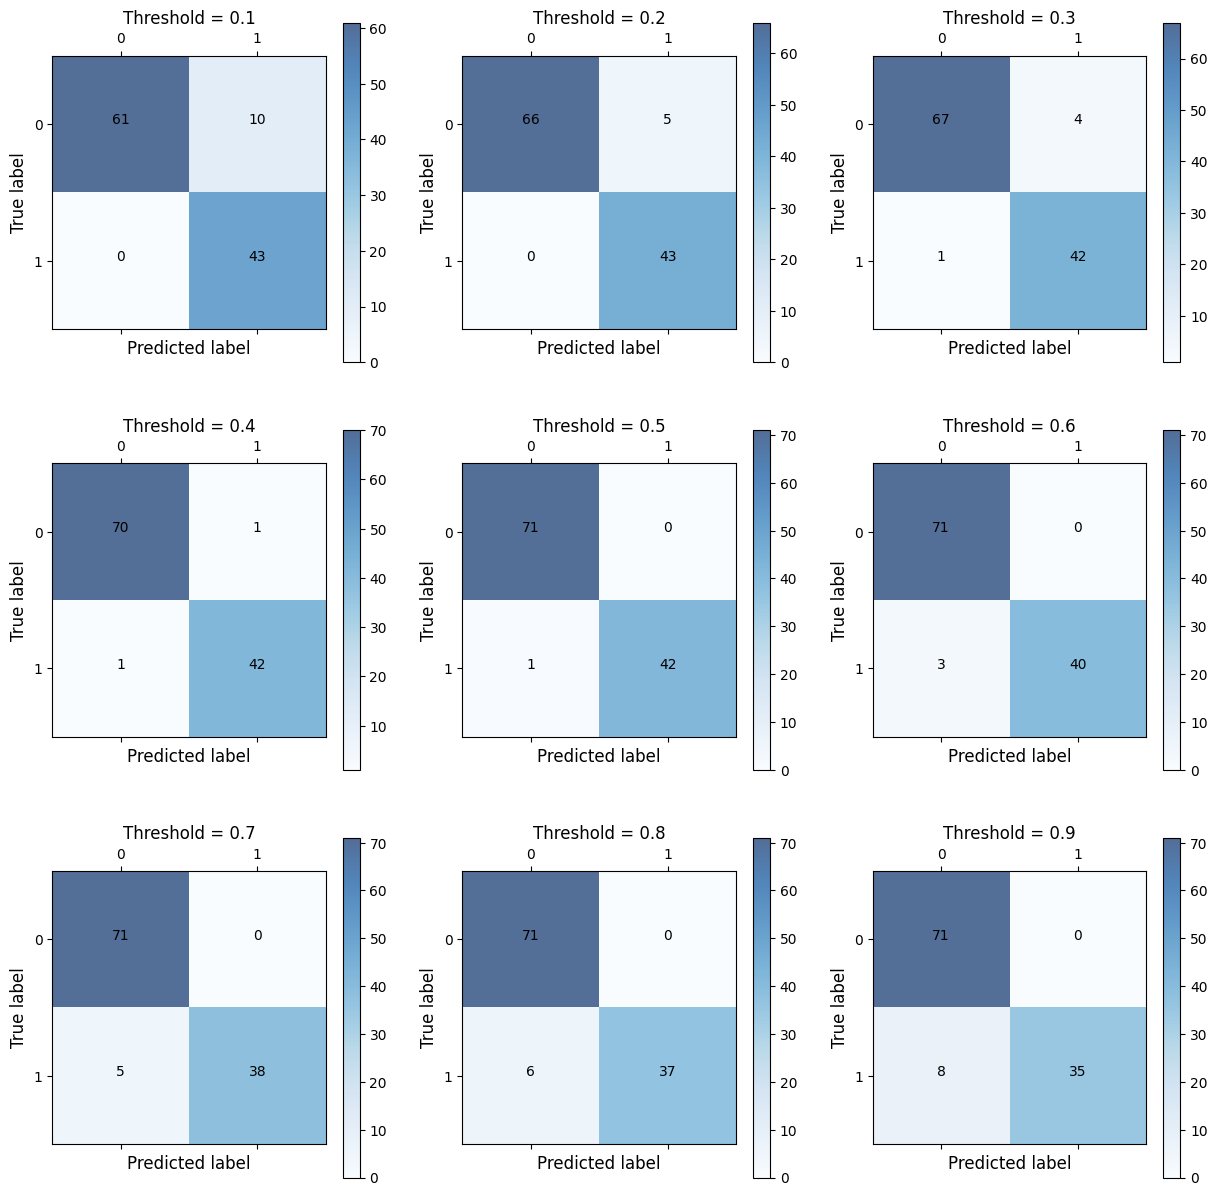

In [31]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for n, ax in zip(thresholds,axs.ravel()):
    y_score = logReg_PCA.predict_proba(X_PCA_test)[:,1] > n
    
    cm = confusion_matrix(y_test, y_score)
    
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]

    print('threshold = %s :'%n,
          'Accuracy={:.3f}'.format((tp+tn)/(tp+tn+fp+fn)),
          'Sensitivity={:.3f}'.format(tp/(tp+fn)),
          'Specificity={:.3f}'.format(tn/(tn+fp)),
          'Precision={:.3f}'.format(tp/(tp+fp)))
    
    im=ax.matshow(cm, cmap='Blues', alpha=0.7)

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        ax.text(j, i, cm[i, j], horizontalalignment = 'center')
        
    ax.set_ylabel('True label',fontsize=12)
    ax.set_xlabel('Predicted label',fontsize=12)
    ax.set_title('Threshold = %s'%n, fontsize=12)
    fig.colorbar(im, ax=ax,orientation='vertical');
plt.show()

**6. 3. Random Forest**

In [32]:
parameters_rf = {
    'n_estimators': [20, 50, 100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
}
# We can test values for other parameters, such as max_features, max_depth, max_leaf_nodes, to see if the accuracy further impoves or not
scoring_rf = 'accuracy' 
"""
    scoring parameters: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
"""
classifier_rf = RandomForestClassifier(random_state=random_state)

# Find the best hyperparameters
cv_results, best_param, best_result = modelselection(classifier_rf,parameters_rf, scoring_rf, X_train)

# Classifier with the best hyperparameters
rf_clf = RandomForestClassifier(n_estimators = best_param['n_estimators'],
                                criterion = best_param['criterion'],
                                bootstrap = best_param['bootstrap'],
                                random_state=random_state)
rf_clf.fit(X_train, y_train)

# Metrics
rf_metrics = metrics(X_test,rf_clf)

The best parameters for classifier is {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 100}
The best training score is 0.967:
Accuracy=0.965
Sensitivity=0.930
Specificity=0.986
Precision=0.976
F-measure=0.952


**6. 4. Random Forest with PCA**

In [33]:
def compare_pca(n_components):
    cv_score, test_score, cv_training_time = [], [], []
    for n in n_components:
        print("The number of components in PCA is:%d "% n)
        pca = PCA(n_components=n, svd_solver="full",random_state=random_state)
        X_PCA_train = pca.fit_transform(X_train)
        X_PCA_test = pca.transform(X_test)
        # Model Selection
        cv_results, best_param, best_result = modelselection(classifier_rf,parameters_rf, scoring, X_PCA_train)
        training_time = np.mean(np.array(cv_results['mean_fit_time'])+np.array(cv_results['mean_score_time']))
        cv_score.append(best_result)
        cv_training_time.append(training_time)
        CV_clf = RandomForestClassifier(n_estimators = best_param['n_estimators'],
                                        criterion = best_param['criterion'],
                                        bootstrap = best_param['bootstrap'],
                                        random_state=random_state)
        CV_clf.fit(X_PCA_train, y_train)
        score = CV_clf.score(X_PCA_test, y_test)
        test_score.append(score)
    print(cv_score, test_score, cv_training_time)
    return cv_score, test_score, cv_training_time

In [35]:
n_features = X_train.shape[1]
n = np.arange(2, n_features+2, 2) 
PCA_cv_score, PCA_test_score, PCA_cv_training_time= compare_pca(n_components = n)


The number of components in PCA is:2 
The best parameters for classifier is {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 150}
The best training score is 0.919:
The number of components in PCA is:4 
The best parameters for classifier is {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 50}
The best training score is 0.941:
The number of components in PCA is:6 
The best parameters for classifier is {'bootstrap': False, 'criterion': 'gini', 'n_estimators': 200}
The best training score is 0.967:
The number of components in PCA is:8 
The best parameters for classifier is {'bootstrap': False, 'criterion': 'gini', 'n_estimators': 200}
The best training score is 0.965:
The number of components in PCA is:10 
The best parameters for classifier is {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 200}
The best training score is 0.963:
The number of components in PCA is:12 
The best parameters for classifier is {'bootstrap': False, 'criterion': 'entropy', 'n_estimat

**6. 4. 1. # of Components in PCA versus Model Accuracy/Training Time**

In [36]:
PCA_curves(PCA_cv_score, PCA_test_score, PCA_cv_training_time)

**6. 4. 2. logistic Regression with PCA (14 components)**

In [37]:
i =PCA_test_score.index(max(PCA_test_score))
pca = PCA(n_components=(i+2)*2, svd_solver="full",random_state=random_state)
X_PCA_train = pca.fit_transform(X_train)
X_PCA_test = pca.transform(X_test)
# Model Selection
cv_results, best_param, best_result = modelselection(classifier_rf,parameters_rf, scoring, X_PCA_train)
rf_PCA = RandomForestClassifier(n_estimators = best_param['n_estimators'],
                                criterion = best_param['criterion'],
                                bootstrap = best_param['bootstrap'],
                                random_state=random_state)
rf_PCA.fit(X_PCA_train, y_train)
# Metrics
rf_PCA_metrics = metrics(X_PCA_test,rf_PCA)

The best parameters for classifier is {'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 100}
The best training score is 0.956:
Accuracy=0.956
Sensitivity=0.953
Specificity=0.958
Precision=0.932
F-measure=0.943


**6. 5. Random Forest with RFE ( Recursive features elimination)**

In [38]:
X_train_selected = X_train[:,rfecv.get_support()]
X_test_selected = X_test[:,rfecv.get_support()]

cv_results, best_param, best_result = modelselection(classifier_rf,parameters_rf, scoring_rf, X_train_selected)

# Classifier with the best hyperparameters
rf_RFE = RandomForestClassifier(n_estimators = best_param['n_estimators'],
                                criterion = best_param['criterion'],
                                bootstrap = best_param['bootstrap'],
                                random_state=random_state)
rf_RFE.fit(X_train_selected, y_train)

# Metrics
rf_RFE_metrics = metrics(X_test_selected ,rf_RFE)

The best parameters for classifier is {'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 20}
The best training score is 0.965:
Accuracy=0.974
Sensitivity=0.953
Specificity=0.986
Precision=0.976
F-measure=0.965


**6. 6. Model Performance Plot**

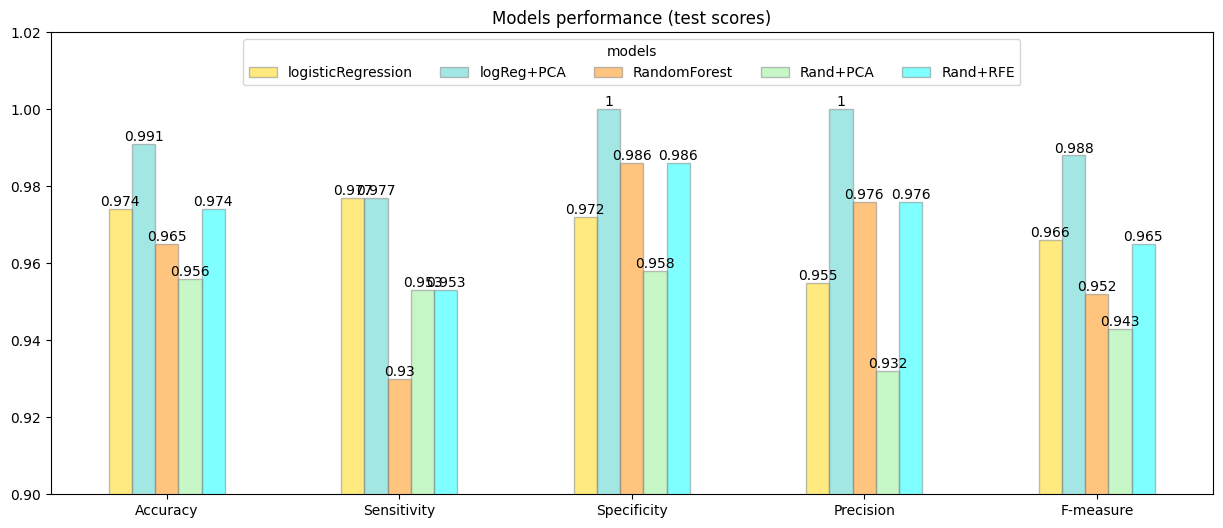

In [39]:
models_metrics = {'logisticRegression': [round(elem, 3) for elem in logReg_metrics], 
                 'logReg+PCA': [round(elem, 3) for elem in logReg_PCA_metrics],
                 'RandomForest' : [round(elem, 3) for elem in rf_metrics],
                 'Rand+PCA' : [round(elem, 3) for elem in rf_PCA_metrics],
                 'Rand+RFE' : [round(elem, 3) for elem in rf_RFE_metrics]
                }
index=['Accuracy','Sensitivity','Specificity','Precision', 'F-measure']
df_scores = pd.DataFrame(data = models_metrics, index=index)
ax = df_scores.plot(kind='bar', figsize = (15,6), ylim = (0.90, 1.02), 
                    color = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen','cyan'],
                    rot = 0, title ='Models performance (test scores)',
                    edgecolor = 'grey', alpha = 0.5)
ax.legend(loc='upper center', ncol=5, title="models")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

As said before, the effectiveness of dimensionality reduction highly depends on the algorithm to be applied later and type of the data to be passed into the methodology. In this breast cancer dataset, the classification performance in logistic regression method is obviously improved after using PCA. In the meanwhile, we also noticed that when we use random forest technique as a classifier, the classification metrics are no overall improvement either with PCA or RFE as dimension reduction method, although the training time is decreased as the number of used features reduced.